# PUBG绝地求生四排的获胜因素和获胜策略

## 一、数据预处理
<p>导入四排数据集dataSquad.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'dataSquad_V2.csv')
print(data.columns)
data.head()

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc',
       'totalDistance', 'headshot_rate', 'kill_rate', 'playersInGroup',
       'weaponsPerDistance', 'healsPerDistance', 'killsPerDistance',
       'distance_over_weapons', 'distance_over_heals', 'distance_over_kills',
       'healthitems', 'skill'],
      dtype='object')


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.0,0,0.0000,0.00,0.00,0,62.40,0.00,0.00,0.00,...,0.0,4,0.004085,0.0,0.000000,244.800000,0.0,0.000000,0,0.0
1,0.0,0,99.7023,0.00,0.00,0,62.13,0.00,0.00,0.00,...,0.0,4,0.003460,0.0,0.000000,289.008900,0.0,0.000000,0,0.0
2,0.0,0,35.8610,0.00,0.00,0,81.75,0.00,0.00,0.00,...,0.0,1,0.014800,0.0,0.000000,67.566667,0.0,0.000000,0,0.0
3,0.0,0,105.0000,1.05,1.05,0,46.20,1.05,1.05,18.44,...,0.5,10,0.028818,0.0,0.030259,34.700000,0.0,33.047619,0,2.1
4,0.0,0,0.0000,0.00,0.00,0,98.88,0.00,0.00,0.00,...,0.0,6,0.074074,0.0,0.000000,13.500000,0.0,0.000000,0,0.0


### 1.数据清洗

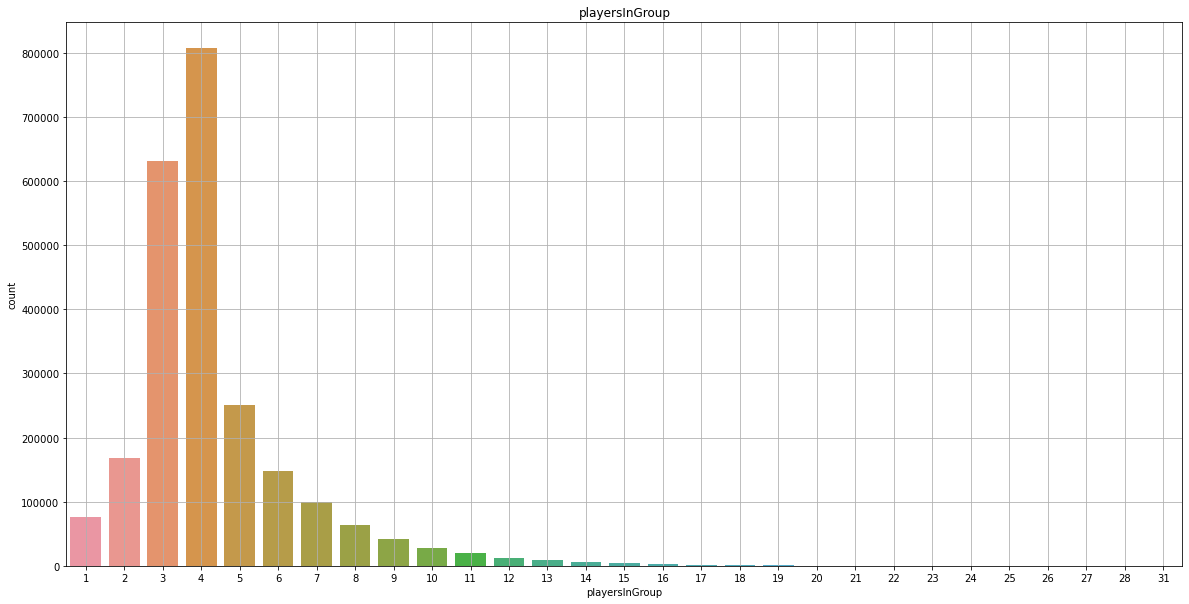

count    2.371965e+06
mean     4.348489e+00
std      2.227660e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      3.100000e+01
Name: playersInGroup, dtype: float64

In [2]:
#通过绘制图像，查看每个玩家在赛局中本队伍玩家人数，正常情况下应不多于4人
#通过seaborn下的countplot方法，可以直接绘制统计过数量之后的直方图
plt.figure(figsize=(20,10))
sns.countplot(data['playersInGroup'])
plt.title('playersInGroup')
plt.grid()
plt.show()
data['playersInGroup'].describe()

In [3]:
#筛选出人数不多于4的队伍
data = data[data['playersInGroup']<=4]
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.00,0,0.0000,0.00,0.00,0,62.40,0.00,0.00,0.0,...,0.000000,4,0.004085,0.000000,0.000000,244.800000,0.0,0.000000,0,0.00
1,0.00,0,99.7023,0.00,0.00,0,62.13,0.00,0.00,0.0,...,0.000000,4,0.003460,0.000000,0.000000,289.008900,0.0,0.000000,0,0.00
2,0.00,0,35.8610,0.00,0.00,0,81.75,0.00,0.00,0.0,...,0.000000,1,0.014800,0.000000,0.000000,67.566667,0.0,0.000000,0,0.00
5,0.00,0,53.1480,0.00,0.00,0,65.92,0.00,0.00,0.0,...,0.000000,3,0.005001,0.000000,0.000000,199.975000,0.0,0.000000,0,0.00
6,0.00,0,38.3881,0.00,0.00,0,76.22,0.00,0.00,0.0,...,0.000000,3,0.015228,0.000000,0.000000,65.670000,0.0,0.000000,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371957,0.00,0,0.0000,0.00,0.00,0,88.40,0.00,0.00,0.0,...,0.000000,4,0.022272,0.000000,0.000000,44.900000,0.0,0.000000,0,0.00
2371958,0.00,0,0.0000,0.00,0.00,0,47.52,0.00,0.00,0.0,...,0.000000,4,0.004229,0.000000,0.000000,236.465600,0.0,0.000000,0,0.00
2371960,1.04,0,157.9760,0.00,0.00,1,80.08,0.00,0.00,0.0,...,0.000000,4,0.008451,0.001207,0.000000,118.328571,828.3,0.000000,1,0.00
2371963,0.00,0,60.2412,0.00,0.00,0,67.32,0.00,0.00,0.0,...,0.000000,3,0.005058,0.000000,0.000000,197.721000,0.0,0.000000,0,0.00


### 2.抽取样本
<p> 抽5万

In [5]:
data_sample = data.sample(n=50000, replace=False, weights=None, random_state=None, axis=None).reset_index(drop=True)
data_sample.to_csv(r'sampleSquad_V2.csv',index=False)
data_sample

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.00,2,43.8450,1.11,0.00,4,24.42,1.11,1.11,94.530,...,0.500,4,0.001372,0.001383,0.000384,729.082500,729.0825,2627.324324,6,1.11
1,0.00,0,0.0000,0.00,0.00,0,83.20,0.00,0.00,0.000,...,0.000,3,0.020629,0.000000,0.000000,48.475000,0.0000,0.000000,0,0.00
2,0.00,4,230.6720,2.08,2.08,0,15.60,2.08,1.04,55.760,...,0.500,3,0.001660,0.000000,0.000863,602.250000,0.0000,1158.173077,4,3.12
3,1.07,1,486.1010,4.28,0.00,5,10.70,3.21,2.14,7.759,...,0.375,3,0.004152,0.002595,0.001666,240.875000,385.4000,600.311526,6,2.14
4,0.00,0,0.0000,0.00,0.00,0,83.93,0.00,0.00,0.000,...,0.000,1,0.019023,0.000000,0.000000,52.566667,0.0000,0.000000,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.00,4,23.9733,0.00,0.00,1,62.01,0.00,0.00,0.000,...,0.000,1,0.001391,0.000348,0.000000,718.750000,2875.0000,0.000000,5,0.00
49996,0.00,0,34.0578,0.00,0.00,0,66.30,0.00,0.00,0.000,...,0.000,2,0.022971,0.000000,0.000000,43.533333,0.0000,0.000000,0,0.00
49997,0.00,0,166.2600,1.02,1.02,1,29.58,1.02,1.02,29.480,...,0.500,4,0.001368,0.000342,0.000349,730.750000,2923.0000,2865.686275,1,2.04
49998,0.00,1,371.3150,4.12,1.03,0,8.24,4.12,2.06,130.500,...,0.500,4,0.003264,0.000000,0.002242,306.333333,0.0000,446.116505,1,3.09


## 二、全数据预测

### 1. 8：2分割训练测试集

In [6]:
#导入数据集
import pandas as pd
data=pd.read_csv(r'sampleSquad_V2.csv')
data.pop('matchDuration')

0        1451.88
1        1955.20
2        1205.36
3        1362.11
4        1370.13
          ...   
49995    2156.31
49996    1353.54
49997    1398.42
49998    1471.87
49999    1349.36
Name: matchDuration, Length: 50000, dtype: float64

In [7]:
#分割数据集
from sklearn.model_selection import train_test_split
x = data.drop(columns=['winPlacePerc'])
y = data['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)

### 2. 标准化

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train_ss=ss.transform(x_train)
x_test_ss=ss.transform(x_test)

In [9]:
x_train.shape

(40000, 30)

### 3. 预测模型
- 神经网络

In [10]:
import keras
#30个变量x
model = keras.models.Sequential()#初始化一个神经网络模型
model.add(keras.layers.Dense(60, activation='relu',input_shape = (x_train_ss.shape[-1],)))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(240, activation='relu'))
# !网络的最后一层只有一个单元,没有激活,是一个线性层
# !这是标量回归（标量回归是预测单一连续值的回归）的典型设置
model.add(keras.layers.Dense(1))
# !编译网络用的是mse损失函数,即均方误差（MSE, mean squared error），测值与目标值之差的平方,这是回归问题常用的损失函数
# !平均绝对误差（MAE, mean absolute error），是预测值与目标值之差的绝对值
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(x_train_ss,y_train,validation_data=(x_test_ss, y_test),epochs=30)#对模型进行训练

Using TensorFlow backend.


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 5s 115us/step - loss: 0.0201 - mae: 0.1020 - val_loss: 0.0138 - val_mae: 0.0884
Epoch 2/30
40000/40000 [==============================] - 4s 103us/step - loss: 0.0120 - mae: 0.0815 - val_loss: 0.0134 - val_mae: 0.0888
Epoch 3/30
40000/40000 [==============================] - 4s 103us/step - loss: 0.0109 - mae: 0.0784 - val_loss: 0.0109 - val_mae: 0.0791
Epoch 4/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.0107 - mae: 0.0769 - val_loss: 0.0106 - val_mae: 0.0781
Epoch 5/30
40000/40000 [==============================] - 4s 100us/step - loss: 0.0102 - mae: 0.0757 - val_loss: 0.0104 - val_mae: 0.0757
Epoch 6/30
40000/40000 [==============================] - 4s 99us/step - loss: 0.0100 - mae: 0.0751 - val_loss: 0.0111 - val_mae: 0.0810
Epoch 7/30
40000/40000 [==============================] - 4s 110us/step - loss: 0.0099 - mae: 0.0743 - val_loss: 0.0113 - v

- 线性回归

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train_ss,y_train)
y_lr_pre = lr.predict(x_test_ss)
print('线性_MAE：',mean_absolute_error(y_test,y_lr_pre))
print('线性_R方：',r2_score(y_test,y_lr_pre))
print('线性Coefficients: \n',lr.coef_)

线性_MAE： 0.09800310651055581
线性_R方： 0.8040107698590454
线性Coefficients: 
 [-1.02610500e-02  1.47928251e+09  2.47919910e-02 -7.77291117e-02
  3.19792232e+09  2.47742649e+09 -2.85361621e-01 -6.43703254e-04
  3.89564840e+09  4.59614112e-03  6.03521698e-03 -2.35115004e+08
  3.01974878e+08 -4.74329127e+06 -4.54368404e-03  5.36103978e-04
 -1.75221817e+08  1.25251015e-02  3.28517026e+08 -2.30201104e-02
 -1.07830256e-01  1.03295053e-02  1.71854056e-03 -4.93302642e-03
 -2.02897981e-02  8.65799038e-03  2.98958647e-03  1.74737663e-02
 -3.47330796e+09 -6.23380305e+09]


- 决策树

In [12]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_ss,y_train)
y_dt_pre = dt.predict(x_test_ss)
print('决策树_MAE：',mean_absolute_error(y_test,y_dt_pre))
print('决策树_R方：',r2_score(y_test,y_dt_pre))
print('决策树参数： \n',dt.feature_importances_)

决策树_MAE： 0.10383025500000001
决策树_R方： 0.7730708585075515
决策树参数： 
 [4.34605199e-03 5.22651056e-03 8.79261323e-03 5.05787728e-03
 1.22081232e-03 1.09093356e-03 2.50417081e-01 6.52802506e-03
 2.65602359e-03 1.02761351e-02 1.30914850e-03 2.38332747e-03
 2.88145602e-05 1.24015618e-03 5.49425128e-04 1.12485926e-04
 6.14504838e-01 2.97054549e-03 8.74299253e-03 4.35213948e-04
 1.67649060e-03 3.63106909e-03 6.85451750e-03 3.35747183e-03
 3.35227476e-02 6.25571380e-03 4.92253504e-03 5.51150184e-03
 3.20796629e-03 3.17097409e-03]


In [14]:
# 决策树调参

from sklearn.model_selection import GridSearchCV
parameters_dt = {'max_depth':[5,6,7,8,9,10,11,12,13,14],'max_features':[18,19,20,21,22,23,24,25,26]}#对参数进行调参
gs_dt = GridSearchCV(dt,parameters_dt,scoring='neg_mean_absolute_error')#以MAE作为评价标准
gs_dt.fit(x_train_ss,y_train)
print(gs_dt.best_params_)
print(gs_dt.best_estimator_)

gs_dt.best_estimator_.fit(x_train_ss,y_train)
y_dt_pre2 = gs_dt.best_estimator_.predict(x_test_ss)

print('决策树_MAE：',mean_absolute_error(y_test,y_dt_pre2))
print('决策树_R方：',r2_score(y_test,y_dt_pre2))
print('决策树参数： \n',gs_dt.best_estimator_.feature_importances_)

{'max_depth': 9, 'max_features': 25}
DecisionTreeRegressor(max_depth=9, max_features=25)
决策树_MAE： 0.08057580616881285
决策树_R方： 0.8653147329354002
决策树参数： 
 [1.48530435e-03 6.02510037e-03 5.67465865e-04 6.15883107e-04
 6.25802567e-05 4.05106651e-05 2.21453011e-01 4.37309880e-03
 4.28053951e-04 9.46891875e-04 6.54115147e-05 2.21235803e-04
 0.00000000e+00 5.56133270e-05 9.40032577e-05 0.00000000e+00
 7.35068711e-01 1.31751131e-04 3.39459400e-03 0.00000000e+00
 9.17285421e-03 6.87642047e-04 2.61670941e-04 1.97310025e-04
 4.49077735e-03 8.41899507e-04 2.15568391e-04 4.79128955e-03
 1.37385732e-03 2.93791074e-03]


- 梯度提升回归树(BGRT)

In [15]:
from sklearn import ensemble
import numpy as np
gbr_reg = ensemble.GradientBoostingRegressor()
gbr_reg.fit(x_train_ss,y_train)
y_gbrt_pre=gbr_reg.predict(x_test_ss)

import matplotlib.pyplot as plt
print('GBRT_MAE',mean_absolute_error(y_test,y_gbrt_pre))
print('GBRT_R方：',r2_score(y_test,y_gbrt_pre))
gbr_reg.feature_importances_

GBRT_MAE 0.07676389921535369
GBRT_R方： 0.8791727974864783


array([2.94981823e-03, 1.00716624e-02, 8.59312681e-05, 8.46285519e-04,
       0.00000000e+00, 0.00000000e+00, 2.38534079e-01, 8.58637001e-03,
       3.52946080e-04, 5.78221119e-04, 7.23540610e-06, 5.01149523e-04,
       0.00000000e+00, 6.84774541e-05, 2.24270185e-04, 0.00000000e+00,
       6.30125302e-01, 3.25747227e-05, 4.51335431e-02, 0.00000000e+00,
       8.67284757e-03, 1.13781313e-03, 4.14184134e-04, 1.94298056e-04,
       3.84349313e-02, 1.29357330e-04, 0.00000000e+00, 1.12027087e-02,
       1.65329705e-03, 6.26968078e-05])

- Lasso

In [16]:
from sklearn.linear_model import Lasso,LassoCV

#构造不同的lambda值
Lambdas = np.logspace(-5,2,200)
#设置交叉验证的参数，使用均方误差评估
lasso_cv = LassoCV(alphas=Lambdas,normalize=True,cv=10,max_iter=10000)
lasso_cv.fit(x_train_ss,y_train)
 
#基于最佳lambda值建模
lasso = Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
lasso.fit(x_train_ss,y_train)

y_lasso_pre = lasso.predict(x_test_ss)
# print(lasso)
print('lasso_MAE:',mean_absolute_error(y_test,y_lasso_pre))
print('lasso_R方：',r2_score(y_test,y_lasso_pre))

lasso_MAE: 0.09869823981125833
lasso_R方： 0.8017156780164403


- 随机森林

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
rf.fit(x_train_ss, y_train)

y_rf_pre = rf.predict(x_test_ss)
# print(lasso)
print('随机森林_MAE:',mean_absolute_error(y_test,y_rf_pre))
print('随机森林_R方：',r2_score(y_test,y_rf_pre))

随机森林_MAE: 0.08034921215354743
随机森林_R方： 0.8680188128581426


- KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=16,weights='distance') #实例化
knr.fit(x_train_ss, y_train) #训练模型
y_knr_pre = knr.predict(x_test_ss) #预测

print('knn_MAE:',mean_absolute_error(y_test, y_knr_pre))
print('knn_R方：',r2_score(y_test, y_knr_pre))

knn_MAE: 0.09649131294133503
knn_R方： 0.8091066571688492


In [26]:
# knn调参
parameters_knn = {'n_neighbors':[18,19,20,21,22],'weights':['uniform','distance']}#对参数进行调参
gs_knn = GridSearchCV(knr,parameters_knn,scoring='neg_mean_absolute_error')#以MAE作为评价标准
gs_knn.fit(x_train_ss,y_train)
print(gs_knn.best_params_)
print(gs_knn.best_estimator_)

gs_knn.best_estimator_.fit(x_train_ss,y_train)
y_knn_pre2 = gs_knn.best_estimator_.predict(x_test_ss)

print('KNN_MAE：',mean_absolute_error(y_test,y_knn_pre2))
print('KNN_R方：',r2_score(y_test,y_knn_pre2))

{'n_neighbors': 20, 'weights': 'distance'}
KNeighborsRegressor(n_neighbors=20, weights='distance')
KNN_MAE： 0.09646969488943312
KNN_R方： 0.810039350436766


## 三、全特征聚类后预测

In [43]:
#读取数据集sampleSquad.csv
import pandas as pd
data = pd.read_csv(r'data_cluster_squad_V2.csv')
data.pop('matchDuration')
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill,dbscan
0,0.00,2,43.845,1.11,0.00,4,24.42,1.11,1.11,94.530,...,4,0.001372,0.001383,0.000384,729.082500,729.0825,2627.324324,6,1.11,0
1,0.00,0,0.000,0.00,0.00,0,83.20,0.00,0.00,0.000,...,3,0.020629,0.000000,0.000000,48.475000,0.0000,0.000000,0,0.00,0
2,0.00,4,230.672,2.08,2.08,0,15.60,2.08,1.04,55.760,...,3,0.001660,0.000000,0.000863,602.250000,0.0000,1158.173077,4,3.12,0
3,1.07,1,486.101,4.28,0.00,5,10.70,3.21,2.14,7.759,...,3,0.004152,0.002595,0.001666,240.875000,385.4000,600.311526,6,2.14,0
4,0.00,0,0.000,0.00,0.00,0,83.93,0.00,0.00,0.000,...,1,0.019023,0.000000,0.000000,52.566667,0.0000,0.000000,0,0.00,0


In [44]:
data_center = data.groupby('dbscan').mean()
data_center

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
dbscan,,,,,,,,,,,,,,,,,,,,,
-1,0.688333,2.500000,567.654902,4.146190,2.181667,2.857143,24.817143,5.336905,1.642619,108.600664,...,0.426134,3.023810,0.458587,0.012299,0.037771,1781.755007,2123.152812,1140.576159,5.357143,4.654524
0,0.362637,1.421040,160.595411,1.043580,0.272975,1.835897,44.091560,1.124919,0.662020,29.024911,...,0.246225,3.286207,0.008208,0.001373,0.001647,524.486741,783.430451,751.368607,3.256937,0.934994
1,0.781063,2.895706,312.314573,1.903988,0.563742,3.813906,24.908569,2.602945,1.177485,78.900452,...,0.383503,3.386503,0.001402,0.001800,0.001108,1019.853878,1646.244529,1720.746739,6.709611,1.741227
2,0.461207,2.672414,329.279830,2.453621,0.416983,3.879310,16.365776,2.660948,1.306638,63.747462,...,0.495216,3.224138,0.001095,0.002691,0.001785,1357.316023,2445.892513,3416.907922,6.551724,2.776897
3,1.526667,3.944444,451.415167,2.465556,0.460556,2.944444,13.891111,4.093333,1.580556,123.346667,...,0.456652,3.722222,0.001099,0.001120,0.001473,1064.276499,2858.546826,1985.298546,6.888889,2.041111


In [45]:
data['dbscan'].value_counts()

 0    49335
 1      489
 2      116
-1       42
 3       18
Name: dbscan, dtype: int64

In [46]:
# 按照label划分数据集
outlier,data1,data2,data3,data4 = data.groupby('dbscan')
print('簇类数据集的标签：',outlier[0],data1[0],data2[0],data3[0],data4[0])

簇类数据集的标签： -1 0 1 2 3


### 1.四个簇类的winPlacePerc分布

#### （1）簇类1

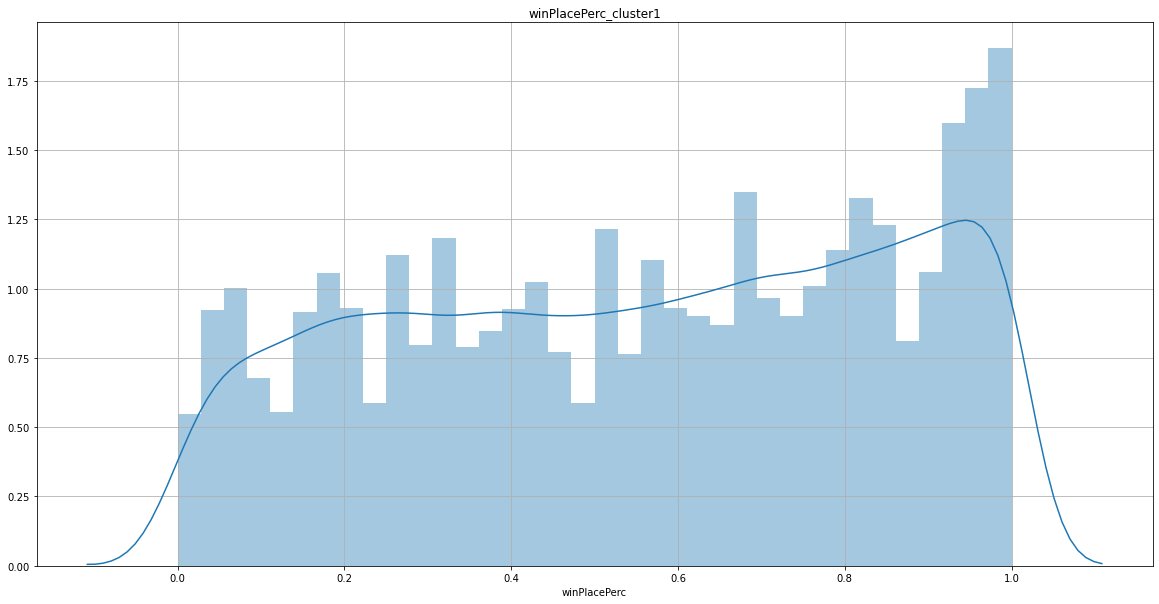

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
# 簇类1的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data1[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster1')
plt.grid()
plt.show()

#### （2）簇类2

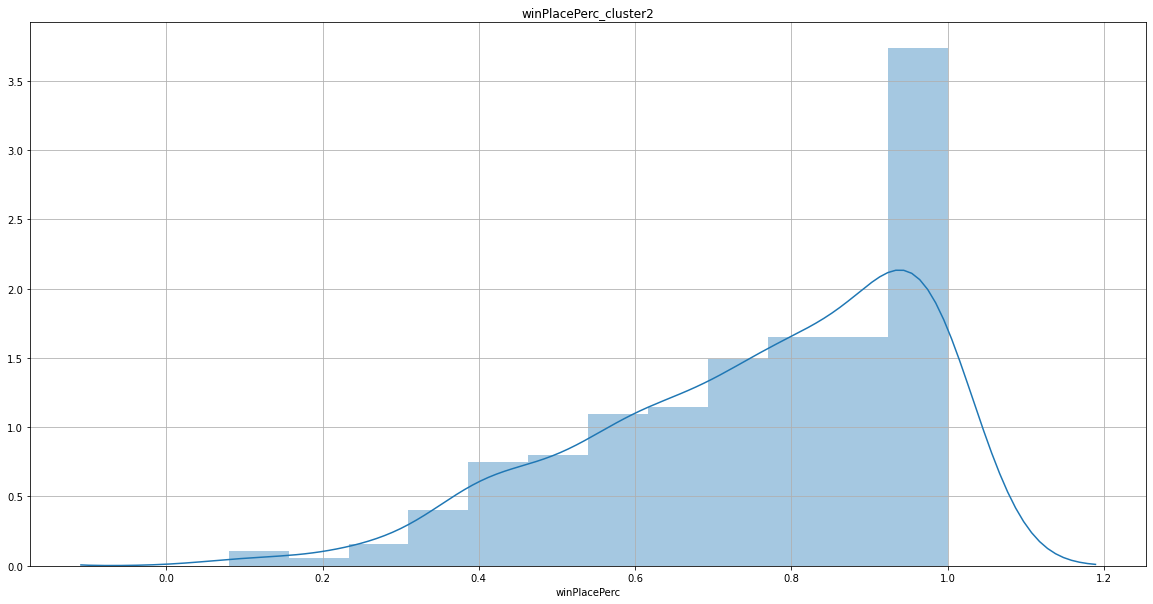

In [48]:
# 簇类2的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data2[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster2')
plt.grid()
plt.show()

#### （3）簇类3

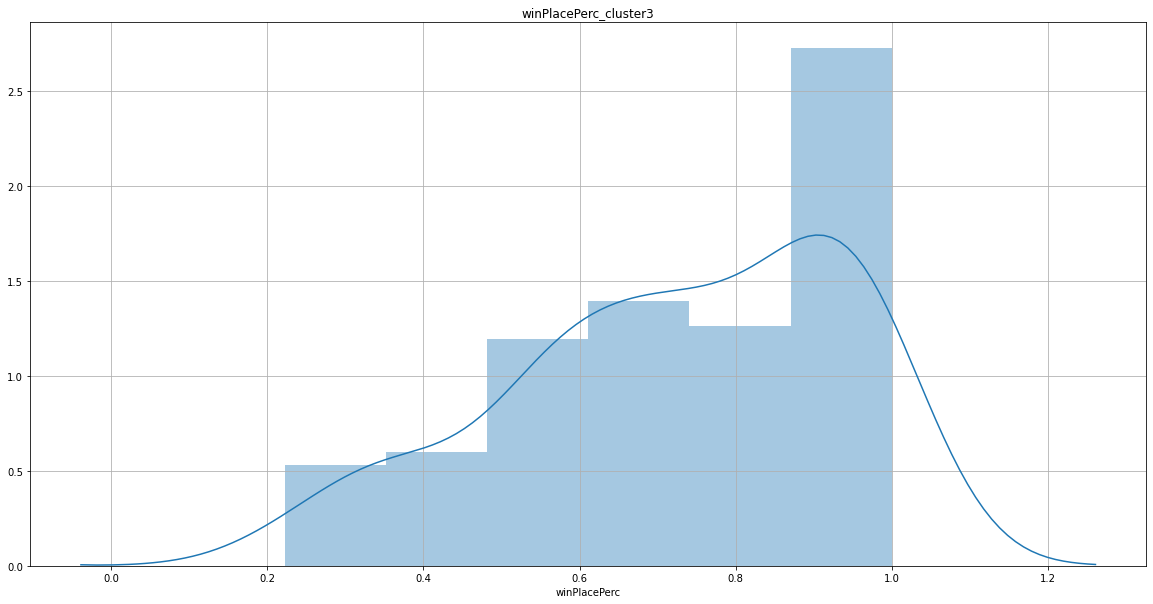

In [49]:
# 簇类3的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data3[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster3')
plt.grid()
plt.show()

#### （4）簇类4

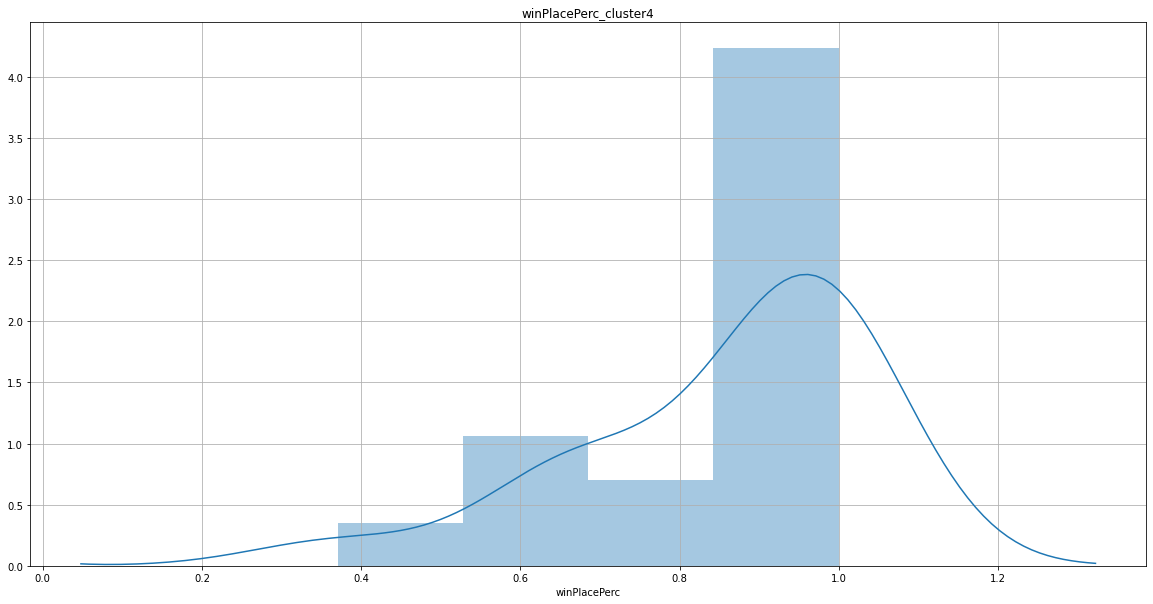

In [51]:
# 簇类4的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data4[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster4')
plt.grid()
plt.show()

### 2.数据集处理

In [52]:
# 以8：2划分训练集和测试集
from sklearn.model_selection import train_test_split
train1,test1 = train_test_split(data1[1],test_size=0.2,random_state=10)
train2,test2 = train_test_split(data2[1],test_size=0.2,random_state=10)
train3,test3 = train_test_split(data3[1],test_size=0.2,random_state=10)
train4,test4 = train_test_split(data4[1],test_size=0.2,random_state=10)

In [53]:
train1_x = train1.drop(columns = ['winPlacePerc','dbscan'])
train1_y = train1['winPlacePerc']
train2_x = train2.drop(columns = ['winPlacePerc','dbscan'])
train2_y = train2['winPlacePerc']
train3_x = train3.drop(columns = ['winPlacePerc','dbscan'])
train3_y = train3['winPlacePerc']
train4_x = train4.drop(columns = ['winPlacePerc','dbscan'])
train4_y = train4['winPlacePerc']

test1_x = test1.drop(columns = ['winPlacePerc','dbscan'])
test1_y = test1['winPlacePerc']
test2_x = test2.drop(columns = ['winPlacePerc','dbscan'])
test2_y = test2['winPlacePerc']
test3_x = test3.drop(columns = ['winPlacePerc','dbscan'])
test3_y = test3['winPlacePerc']
test4_x = test4.drop(columns = ['winPlacePerc','dbscan'])
test4_y = test4['winPlacePerc']

In [54]:
#标准化
from sklearn.preprocessing import StandardScaler

ss1 = StandardScaler()
ss1.fit(train1_x)
train1_x_ss = ss1.transform(train1_x)
test1_x_ss = ss1.transform(test1_x)

ss2 = StandardScaler()
ss2.fit(train2_x)
train2_x_ss = ss2.transform(train2_x)
test2_x_ss = ss2.transform(test2_x)

ss3 = StandardScaler()
ss3.fit(train3_x)
train3_x_ss = ss3.transform(train3_x)
test3_x_ss = ss3.transform(test3_x)

ss4 = StandardScaler()
ss4.fit(train4_x)
train4_x_ss = ss4.transform(train4_x)
test4_x_ss = ss4.transform(test4_x)

### 3.预测

In [55]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [56]:
gbr_reg1 = ensemble.GradientBoostingRegressor()
gbr_reg1.fit(train1_x_ss,train1_y)
y_pre=gbr_reg1.predict(test1_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test1_y,y_pre))
print('GBRT_R方：',r2_score(test1_y,y_pre))
gbr_reg1.feature_importances_

gbr_reg_MAE 0.07466506575122964
GBRT_R方： 0.8876052871904884


array([3.01679030e-03, 8.04425970e-03, 1.42320863e-05, 1.10064019e-03,
       7.76114606e-06, 0.00000000e+00, 2.38352085e-01, 6.60915520e-03,
       1.76544939e-04, 4.84856165e-04, 2.18416524e-05, 5.72062637e-04,
       0.00000000e+00, 2.87397892e-05, 1.69889080e-04, 0.00000000e+00,
       6.44258508e-01, 0.00000000e+00, 3.39727530e-02, 0.00000000e+00,
       7.35145458e-03, 1.13493616e-03, 4.29641709e-04, 9.65184212e-05,
       4.30873687e-02, 2.02847278e-04, 2.29606321e-05, 9.26214443e-03,
       1.53694701e-03, 4.50621783e-05])

In [57]:
gbr_reg2 = ensemble.GradientBoostingRegressor()
gbr_reg2.fit(train2_x_ss,train2_y)
y_pre2=gbr_reg2.predict(test2_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test2_y,y_pre2))
print('GBRT_R方：',r2_score(test2_y,y_pre2))
gbr_reg2.feature_importances_

gbr_reg_MAE 0.09164953736295177
GBRT_R方： 0.6902278904036576


array([0.00516799, 0.01571753, 0.02458985, 0.01085204, 0.00281277,
       0.00184842, 0.39815437, 0.01992776, 0.00406155, 0.0220187 ,
       0.00658899, 0.01038585, 0.        , 0.0045884 , 0.00691179,
       0.        , 0.31900013, 0.00639078, 0.05792992, 0.00694609,
       0.00119534, 0.00372076, 0.0051724 , 0.00505129, 0.02599347,
       0.00644841, 0.01024478, 0.00743786, 0.00490908, 0.00593369])

In [58]:
gbr_reg3 = ensemble.GradientBoostingRegressor()
gbr_reg3.fit(train3_x_ss,train3_y)
y_pre3=gbr_reg3.predict(test3_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test3_y,y_pre3))
print('GBRT_R方：',r2_score(test3_y,y_pre3))
gbr_reg3.feature_importances_

gbr_reg_MAE 0.16319037902074643
GBRT_R方： 0.30766849597408097


array([0.00210646, 0.00731418, 0.02048069, 0.04107981, 0.00067424,
       0.0055371 , 0.14463763, 0.01847469, 0.00860393, 0.01585666,
       0.0009712 , 0.01362202, 0.04355508, 0.        , 0.00247395,
       0.        , 0.24700774, 0.01306514, 0.0241574 , 0.00803394,
       0.00315588, 0.00109886, 0.00157904, 0.0193308 , 0.01813932,
       0.00047102, 0.03387964, 0.01881104, 0.28463299, 0.00124955])

In [59]:
gbr_reg4 = ensemble.GradientBoostingRegressor()
gbr_reg4.fit(train4_x_ss,train4_y)
y_pre4=gbr_reg4.predict(test4_x_ss)

print('gbr_reg_MAE4',mean_absolute_error(test4_y,y_pre4))
print('GBRT_R方4：',r2_score(test4_y,y_pre4))
gbr_reg4.feature_importances_

gbr_reg_MAE4 0.16717145558130467
GBRT_R方4： -2.4395268541000936


array([7.99933351e-03, 4.07614017e-03, 6.23277845e-04, 6.06188540e-02,
       9.96021395e-03, 7.60462092e-06, 5.52234043e-02, 3.25040320e-03,
       3.31202371e-04, 3.08471850e-03, 7.39895067e-06, 1.44660793e-05,
       0.00000000e+00, 0.00000000e+00, 3.48682795e-02, 0.00000000e+00,
       8.74520128e-03, 2.84942750e-04, 5.18587401e-04, 8.01337213e-06,
       5.05101200e-04, 0.00000000e+00, 3.85504769e-05, 1.05315463e-03,
       9.07600059e-03, 2.00456496e-04, 3.45729164e-04, 7.79443466e-03,
       7.19095124e-01, 7.22694067e-02])

## 四、特征选择+预测

In [1]:
#读取数据集sampleSquad.csv
import pandas as pd
data = pd.read_csv(r'sampleSquad_V2.csv')
data.pop('matchDuration')
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.00,2,43.845,1.11,0.00,4,24.42,1.11,1.11,94.530,...,0.500,4,0.001372,0.001383,0.000384,729.082500,729.0825,2627.324324,6,1.11
1,0.00,0,0.000,0.00,0.00,0,83.20,0.00,0.00,0.000,...,0.000,3,0.020629,0.000000,0.000000,48.475000,0.0000,0.000000,0,0.00
2,0.00,4,230.672,2.08,2.08,0,15.60,2.08,1.04,55.760,...,0.500,3,0.001660,0.000000,0.000863,602.250000,0.0000,1158.173077,4,3.12
3,1.07,1,486.101,4.28,0.00,5,10.70,3.21,2.14,7.759,...,0.375,3,0.004152,0.002595,0.001666,240.875000,385.4000,600.311526,6,2.14
4,0.00,0,0.000,0.00,0.00,0,83.93,0.00,0.00,0.000,...,0.000,1,0.019023,0.000000,0.000000,52.566667,0.0000,0.000000,0,0.00


In [2]:
#分割数据集
from sklearn.model_selection import train_test_split
x = data.drop(columns=['winPlacePerc'])
y = data['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)

In [3]:
# 标准化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train_ss=ss.transform(x_train)
x_test_ss=ss.transform(x_test)

In [4]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [5]:
from sklearn.feature_selection import SelectKBest

df = []
for i in range(29):
    SKB = SelectKBest(k=i+1)#选取对于分类最有作用的前k个特征，取PCA结果数量
    SKB.fit(x_train_ss,y_train)
    fselect_train=SKB.transform(x_train_ss)
    fselect_test=SKB.transform(x_test_ss)
    
    gbr_reg = ensemble.GradientBoostingRegressor()
    gbr_reg.fit(fselect_train,y_train)
    y_pr=gbr_reg.predict(fselect_test)
    
    df.append({'columnNumbers':format(fselect_train.shape[1]),'column':SKB.get_support(),'MAE':mean_absolute_error(y_test,y_pr),'R方':r2_score(y_test,y_pr)})
    
dataframe = pd.DataFrame(df)
dataframe

,columnNumbers,column,MAE,R方
0,1,"[False, False, False, False, False, False, Fal...",0.123349,0.694076
1,2,"[False, False, False, False, False, False, Tru...",0.089578,0.818184
2,3,"[False, False, False, False, False, False, Tru...",0.089059,0.820934
3,4,"[False, True, False, False, False, False, True...",0.088537,0.822481
4,5,"[False, True, False, False, False, False, True...",0.088700,0.821950
5,6,"[False, True, False, False, False, False, True...",0.088604,0.823677
6,7,"[False, True, False, False, False, False, True...",0.088662,0.823507
7,8,"[False, True, True, False, False, False, True,...",0.088275,0.828992
8,9,"[False, True, True, False, False, False, True,...",0.076959,0.879127
9,10,"[False, True, True, False, False, False, True,...",0.077010,0.879150


In [6]:
# SelectKBest降维
SKB=SelectKBest(k=24)#选取对于分类最有作用的前k个特征，取PCA结果数量
SKB.fit(x_train_ss,y_train)
fselect_train=SKB.transform(x_train_ss)
fselect_test=SKB.transform(x_test_ss)
print('SelectKBest降维前数据有{}列'.format(x_train_ss.shape[1]))
print('SelectKBest降维后数据有{}列'.format(fselect_train.shape[1]))
print(SKB.get_support())

SelectKBest降维前数据有30列
SelectKBest降维后数据有24列
[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False  True  True  True  True  True  True False False
  True  True  True  True  True  True]


In [7]:
gbr_reg = ensemble.GradientBoostingRegressor()
gbr_reg.fit(fselect_train,y_train)
y_gbrt_pre = gbr_reg.predict(fselect_test)

import matplotlib.pyplot as plt
print('特征选择后GBRT_MAE',mean_absolute_error(y_test,y_gbrt_pre))
print('特征选择后GBRT_R方：',r2_score(y_test,y_gbrt_pre))
gbr_reg.feature_importances_

特征选择后GBRT_MAE 0.07640636211886376
特征选择后GBRT_R方： 0.8799602048181085


array([2.93013406e-03, 1.00603714e-02, 6.98741971e-05, 8.36025116e-04,
       0.00000000e+00, 2.83813052e-05, 2.39953475e-01, 7.84630014e-03,
       4.17997102e-04, 3.14379981e-04, 2.57858433e-05, 4.90793928e-04,
       6.30660518e-01, 4.01145361e-05, 4.56293047e-02, 4.99176568e-06,
       8.48110543e-03, 1.11635458e-03, 3.87020593e-02, 7.19438002e-04,
       0.00000000e+00, 9.99063064e-03, 1.68196436e-03, 0.00000000e+00])

In [8]:
column = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals','killPlace', 'kills', 'killStreaks', 'longestKill', 'revives','rideDistance','walkDistance', 'weaponsAcquired', 'totalDistance','headshot_rate', 'kill_rate', 'playersInGroup', 'killsPerDistance', 'distance_over_weapons','distance_over_heals', 'distance_over_kills', 'healthitems', 'skill', 'winPlacePerc']
data_select = data[column]
data_select.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'revives',
       'rideDistance', 'walkDistance', 'weaponsAcquired', 'totalDistance',
       'headshot_rate', 'kill_rate', 'playersInGroup', 'killsPerDistance',
       'distance_over_weapons', 'distance_over_heals', 'distance_over_kills',
       'healthitems', 'skill', 'winPlacePerc'],
      dtype='object')

In [9]:
data_select.to_csv(r'selectSquad_V2.csv',index=False)

## 五、特征选择聚类后预测

In [10]:
import pandas as pd
data = pd.read_csv(r'select_cluster_squad_V2.csv')
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill,winPlacePerc,dbscan
0,0.00,2,43.845,1.11,0.00,4,24.42,1.11,1.11,94.530,...,0.500,4,0.000384,729.082500,729.0825,2627.324324,6,1.11,0.7200,0
1,0.00,0,0.000,0.00,0.00,0,83.20,0.00,0.00,0.000,...,0.000,3,0.000000,48.475000,0.0000,0.000000,0,0.00,0.1111,0
2,0.00,4,230.672,2.08,2.08,0,15.60,2.08,1.04,55.760,...,0.500,3,0.000863,602.250000,0.0000,1158.173077,4,3.12,0.8846,0
3,1.07,1,486.101,4.28,0.00,5,10.70,3.21,2.14,7.759,...,0.375,3,0.001666,240.875000,385.4000,600.311526,6,2.14,0.5926,0
4,0.00,0,0.000,0.00,0.00,0,83.93,0.00,0.00,0.000,...,0.000,1,0.000000,52.566667,0.0000,0.000000,0,0.00,0.0769,0


In [11]:
data.groupby('dbscan').mean()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,headshot_rate,kill_rate,playersInGroup,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill,winPlacePerc
dbscan,,,,,,,,,,,,,,,,,,,,,
-1,1.261663,4.262396,544.258126,3.700904,1.390382,6.107942,10.479737,4.599188,1.784884,145.628344,...,0.311017,0.473862,3.212813,0.003517,1278.501237,1980.742790,2143.782501,10.370338,3.202075,0.858331
0,0.324540,1.304253,144.491547,0.930767,0.224000,1.657618,45.417218,0.980578,0.615901,24.123139,...,0.105588,0.237522,3.290523,0.001584,496.776524,740.899105,702.078269,2.961871,0.841912,0.541588
1,2.675000,3.000000,574.475500,2.725000,1.080000,4.500000,4.785000,4.320000,2.160000,38.995000,...,0.250000,0.444444,2.500000,0.001500,902.228571,1366.750000,1241.060229,7.500000,3.240000,0.945050
2,0.813750,5.875000,942.749625,7.075000,3.206250,2.750000,1.490000,9.553750,2.793750,163.663750,...,0.343876,0.547612,3.250000,0.002724,774.197917,1570.895833,434.594826,8.625000,6.000000,0.986287
3,3.122500,5.000000,886.601500,4.675000,2.080000,7.750000,1.040000,7.542500,2.080000,146.400000,...,0.279762,0.494444,3.750000,0.002209,1070.316383,1104.402054,1132.277202,12.750000,4.160000,0.981825


In [12]:
data['dbscan'].value_counts()

 0    47707
-1     2279
 2        8
 3        4
 1        2
Name: dbscan, dtype: int64

In [14]:
# 按照label划分数据集
outlier,data1,data2,data3,data4 = data.groupby('dbscan')
print('簇类数据集的标签：',outlier[0],data1[0],data2[0],data3[0],data4[0])

簇类数据集的标签： -1 0 1 2 3


### 1.四个簇类的winPlacePerc分布

#### （1）簇类1

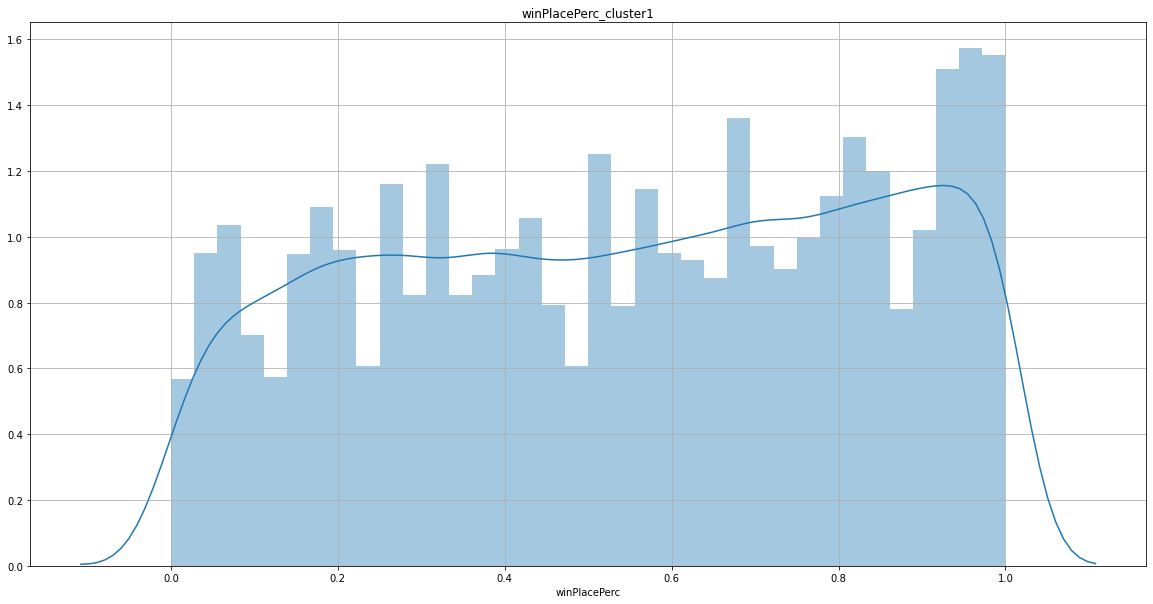

In [17]:
import seaborn as sns
# 簇类1的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data1[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster1')
plt.grid()
plt.show()

#### （2）簇类2

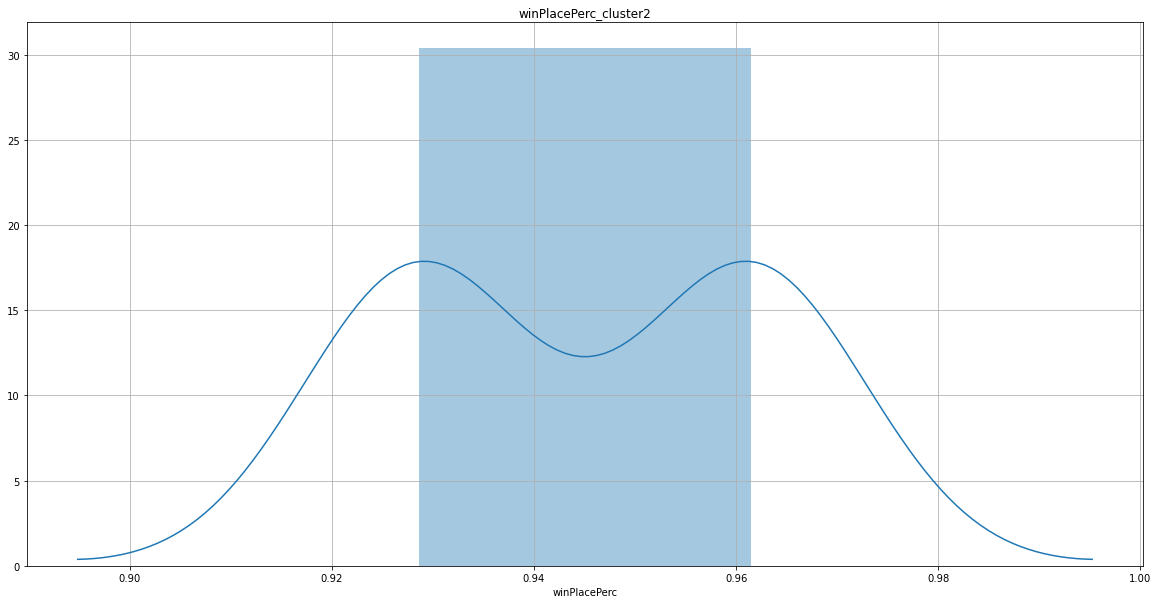

In [18]:
# 簇类2的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data2[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster2')
plt.grid()
plt.show()

#### （3）簇类3

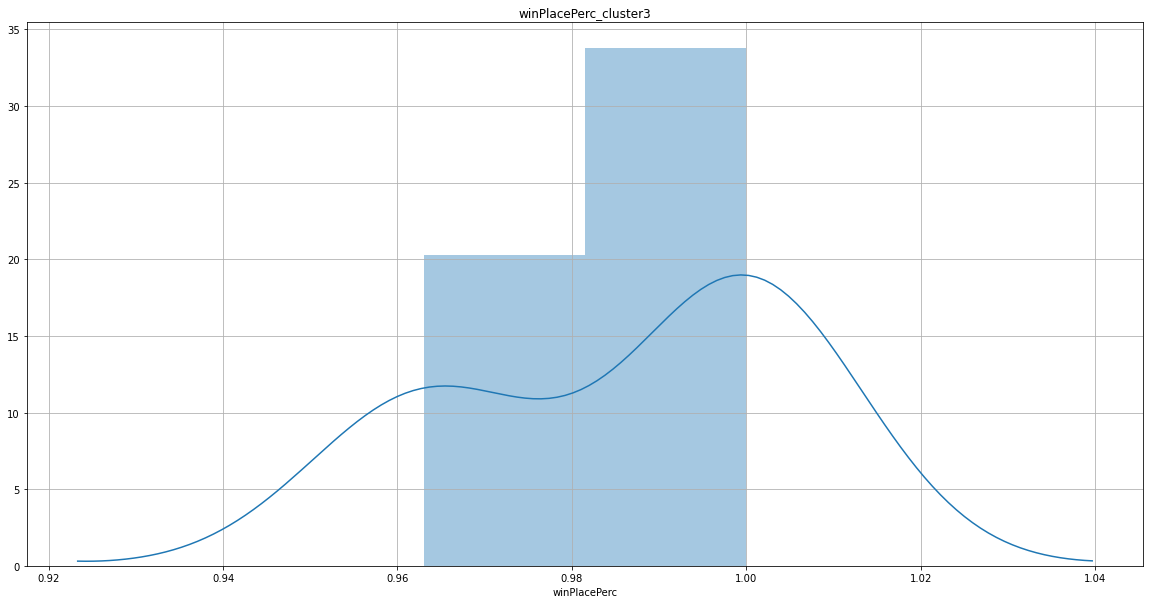

In [19]:
# 簇类3的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data3[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster3')
plt.grid()
plt.show()

#### （4）簇类4

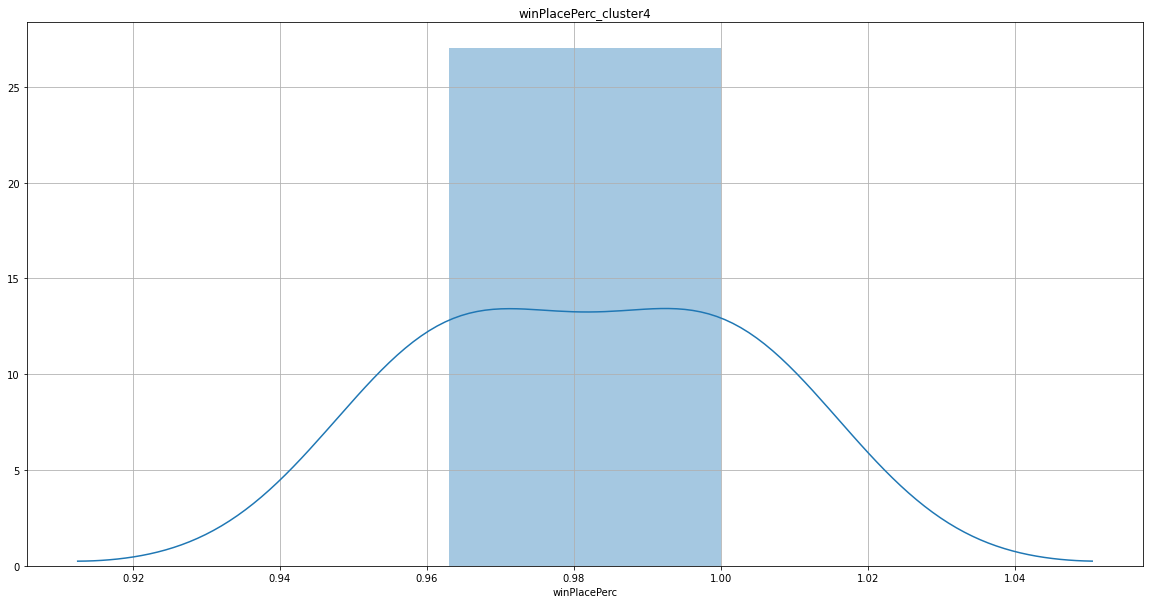

In [20]:
# 簇类4的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data4[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster4')
plt.grid()
plt.show()

### 2.数据集处理

In [21]:
# 以8：2划分训练集和测试集
from sklearn.model_selection import train_test_split
train1,test1 = train_test_split(data1[1],test_size=0.2,random_state=10)
train2,test2 = train_test_split(data2[1],test_size=0.2,random_state=10)
train3,test3 = train_test_split(data3[1],test_size=0.2,random_state=10)
train4,test4 = train_test_split(data4[1],test_size=0.2,random_state=10)

In [22]:
train1_x = train1.drop(columns = ['winPlacePerc','dbscan'])
train1_y = train1['winPlacePerc']
train2_x = train2.drop(columns = ['winPlacePerc','dbscan'])
train2_y = train2['winPlacePerc']
train3_x = train3.drop(columns = ['winPlacePerc','dbscan'])
train3_y = train3['winPlacePerc']
train4_x = train4.drop(columns = ['winPlacePerc','dbscan'])
train4_y = train4['winPlacePerc']

test1_x = test1.drop(columns = ['winPlacePerc','dbscan'])
test1_y = test1['winPlacePerc']
test2_x = test2.drop(columns = ['winPlacePerc','dbscan'])
test2_y = test2['winPlacePerc']
test3_x = test3.drop(columns = ['winPlacePerc','dbscan'])
test3_y = test3['winPlacePerc']
test4_x = test4.drop(columns = ['winPlacePerc','dbscan'])
test4_y = test4['winPlacePerc']

In [23]:
#标准化
from sklearn.preprocessing import StandardScaler

ss1 = StandardScaler()
ss1.fit(train1_x)
train1_x_ss = ss1.transform(train1_x)
test1_x_ss = ss1.transform(test1_x)

ss2 = StandardScaler()
ss2.fit(train2_x)
train2_x_ss = ss2.transform(train2_x)
test2_x_ss = ss2.transform(test2_x)

ss3 = StandardScaler()
ss3.fit(train3_x)
train3_x_ss = ss3.transform(train3_x)
test3_x_ss = ss3.transform(test3_x)

ss4 = StandardScaler()
ss4.fit(train4_x)
train4_x_ss = ss4.transform(train4_x)
test4_x_ss = ss4.transform(test4_x)

### 3.预测

In [24]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [25]:
gbr_reg1 = ensemble.GradientBoostingRegressor()
gbr_reg1.fit(train1_x_ss,train1_y)
y_pre1=gbr_reg1.predict(test1_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test1_y,y_pre1))
print('GBRT_R方：',r2_score(test1_y,y_pre1))
gbr_reg1.feature_importances_

gbr_reg_MAE 0.07560785117212285
GBRT_R方： 0.8795992214217496


array([2.22678249e-03, 7.12245099e-03, 1.85997685e-05, 1.03082080e-03,
       0.00000000e+00, 5.95158491e-06, 2.45018996e-01, 8.05635923e-03,
       2.67041862e-03, 8.48519865e-04, 0.00000000e+00, 3.65274606e-04,
       6.32399222e-01, 9.78866013e-06, 3.98471158e-02, 7.30125432e-06,
       3.54427028e-03, 1.16890760e-03, 4.88721464e-02, 7.77077299e-04,
       3.21049128e-05, 3.78456455e-03, 2.16363414e-03, 2.96936075e-05])

In [26]:
gbr_reg2 = ensemble.GradientBoostingRegressor()
gbr_reg2.fit(train2_x_ss,train2_y)
y_pre2=gbr_reg2.predict(test2_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test2_y,y_pre2))
print('GBRT_R方：',r2_score(test2_y,y_pre2))
gbr_reg2.feature_importances_

gbr_reg_MAE 0.03290000000000004
GBRT_R方： nan


D:\SoftWare\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [27]:
gbr_reg3 = ensemble.GradientBoostingRegressor()
gbr_reg3.fit(train3_x_ss,train3_y)
y_pre3=gbr_reg3.predict(test3_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test3_y,y_pre3))
print('GBRT_R方：',r2_score(test3_y,y_pre3))
gbr_reg3.feature_importances_

gbr_reg_MAE 0.01840837367066478
GBRT_R方： 0.0


array([2.00487831e-20, 2.40585397e-19, 9.78944488e-24, 0.00000000e+00,
       0.00000000e+00, 1.92468318e-18, 4.78000238e-26, 1.58778663e-01,
       3.52857260e-01, 4.94338549e-02, 0.00000000e+00, 1.43400071e-26,
       4.11156685e-22, 1.02248805e-18, 0.00000000e+00, 0.00000000e+00,
       1.91200095e-26, 1.79637097e-17, 2.68099785e-01, 6.42187584e-18,
       6.52403864e-02, 0.00000000e+00, 1.28437517e-18, 1.05590050e-01])

In [28]:
gbr_reg4 = ensemble.GradientBoostingRegressor()
gbr_reg4.fit(train4_x_ss,train4_y)
y_pre4=gbr_reg4.predict(test4_x_ss)
print('gbr_reg_MAE4',mean_absolute_error(test4_y,y_pre4))
print('GBRT_R方4：',r2_score(test4_y,y_pre4))
gbr_reg4.feature_importances_

gbr_reg_MAE4 0.03363678794849945
GBRT_R方4： nan


D:\SoftWare\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([2.71503871e-07, 1.21688331e-05, 6.87031051e-02, 1.60423312e-06,
       2.71625975e-03, 1.20205785e-01, 2.21679755e-04, 9.69016988e-02,
       3.45474987e-04, 3.48236148e-03, 1.55593632e-01, 1.98825909e-12,
       4.43143481e-03, 5.24018533e-05, 2.58671797e-01, 2.69419834e-06,
       2.45339699e-02, 5.61543093e-13, 1.36904380e-01, 6.76502603e-07,
       5.09680420e-06, 1.08504268e-01, 1.18905325e-04, 1.85903353e-02])